In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [79]:
df_train = pd.read_csv('df_train_1.csv')
df_test_X = pd.read_csv('df_test_X1.csv')

In [67]:
#df_train.head()

#  <span style="color:black">INPUT FEATURES</span>

In [88]:
features_name = ['station_id','hdres_100','hdres_500','ldres_100','ldres_500','industry_100','industry_500','urbgreen_100','urbgreen_500','roads_length_25','roads_length_100','roads_length_500','major_roads_length_25','major_roads_length_100','major_roads_length_500','distance_0','distance_1','distance_2','distance_3','distance_4','distance_5','distance_6','distance_7','distance_8','distance_9','value_0','value_1','value_2','value_3','value_4','value_5','value_6','value_7','value_8','value_9']
target_name = 'value'
X=df_train[features_name]
y=df_train[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=81)

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#  <span style="color:red">LINEAR REGRESSION</span>

In [91]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
# print the intercept
print(lm.intercept_)

22.693897888735247


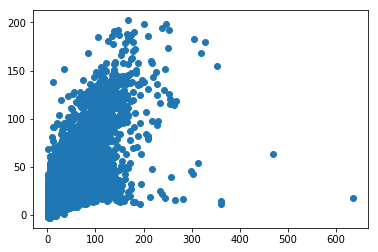

In [93]:
lm_predictions = lm.predict(X_test)
plt.scatter(y_test,lm_predictions)

In [9]:
print('MAE:', mean_absolute_error(y_test, lm_predictions))
print('MSE:', mean_squared_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lm_predictions)))

MAE: 5.305425418783999
MSE: 61.114358102515986
RMSE: 7.817567275215224


In [30]:
#print('MS log E:', mean_squared_log_error(y_test, lm_predictions))

# <span style="color:red">GRADIENT BOOSTING REGRESSOR</span>

In [10]:
from sklearn import ensemble
params = {'n_estimators': 20, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gradient_boost_model = ensemble.GradientBoostingRegressor(**params)

In [11]:
gradient_boost_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=20, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [12]:
gb_predictions = gradient_boost_model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, gb_predictions)
print("MSE: %.4f" % mse)

mse_log = mean_squared_log_error(y_test, gb_predictions)
print("MSE_log: %.4f" % mse_log)

MSE: 158.6762
MSE_log: 0.3241


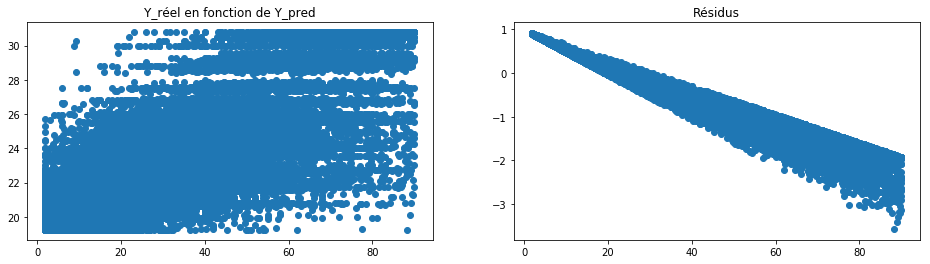

In [14]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.title('Y_réel en fonction de Y_pred')
plt.scatter(y_test,gb_predictions)

plt.subplot(1,2,2)
plt.title('Résidus')
plt.scatter(y_test,(gb_predictions-y_test)/gb_predictions)

# <span style="color:red">DECISION TREE REGRESSOR</span>

In [15]:
from sklearn.tree import DecisionTreeRegressor
dt_R = DecisionTreeRegressor()
dt_R.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [16]:
dt_predictions = dt_R.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, dt_predictions)
print("MSE: %.4f" % mse)

mse_log = mean_squared_log_error(y_test, dt_predictions)
print("MSE_log: %.4f" % mse_log)

MSE: 74.9772
MSE_log: 0.1452


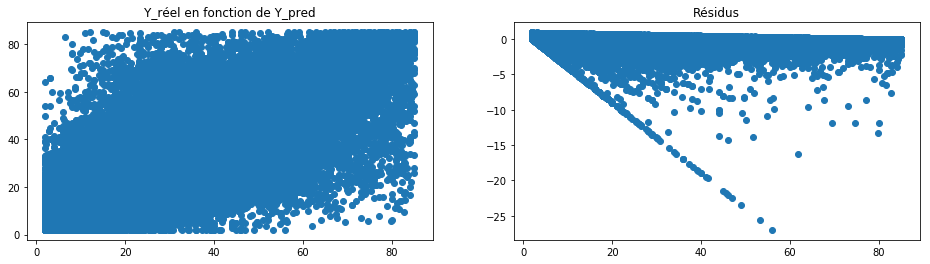

In [34]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.title('Y_réel en fonction de Y_pred')
plt.scatter(y_test,dt_predictions)

plt.subplot(1,2,2)
plt.title('Résidus')
plt.scatter(y_test,(dt_predictions-y_test)/dt_predictions)

# <span style="color:red">RANDOM FOREST</span>

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
#rf = RandomForestRegressor(n_estimators=410,max_features='sqrt',max_depth=46,min_samples_split=2,min_samples_leaf=16,bootstrap=False)
rf_d = RandomForestRegressor()
rf_d.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [95]:
rf_d_predictions = rf_d.predict(X_test)

In [96]:
mse = mean_squared_error(y_test, rf_d_predictions)
print("MSE: %.5f" % mse)

mse_log = mean_squared_log_error(y_test, rf_d_predictions)
print("MSE_log: %.5f" % mse_log)

MSE: 61.40913
MSE_log: 0.08454


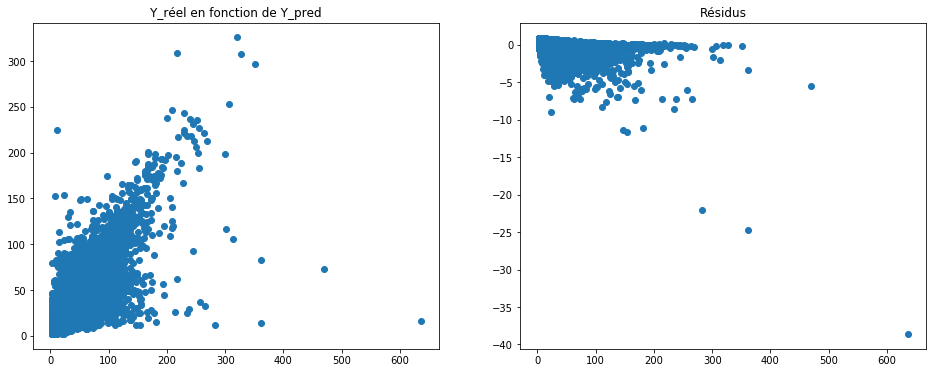

In [100]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Y_réel en fonction de Y_pred')
plt.scatter(y_test,rf_d_predictions)

plt.subplot(1,2,2)
plt.title('Résidus')
plt.scatter(y_test,(rf_d_predictions-y_test)/rf_d_predictions)

In [35]:
rf_d

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [74]:
evaluate(rf_d, X_test, y_test)

Model Performance
Average Error: 3.9779 degrees.
Accuracy = 75.78%.


75.78361416595347

# <span style="color:red">EXTRA TREE</span>

In [75]:
from sklearn.ensemble import ExtraTreesRegressor

In [28]:
et = RandomForestRegressor(n_estimators=410,max_features='sqrt',max_depth=46,min_samples_split=2,min_samples_leaf=16,bootstrap=False)
et.fit(X_train, y_train)
et_predictions = et.predict(X_test)

In [76]:
et_defaut = ExtraTreesRegressor()
et_defaut.fit(X_train, y_train)
et_defaut_predictions = et_defaut.predict(X_test)

In [63]:
mse = mean_squared_error(y_test, et_defaut_predictions)
print("MSE: %.5f" % mse)

mse_log = mean_squared_log_error(y_test, et_defaut_predictions)
print("MSE_log: %.5f" % mse_log)

MSE: 37.00925
MSE_log: 0.07668


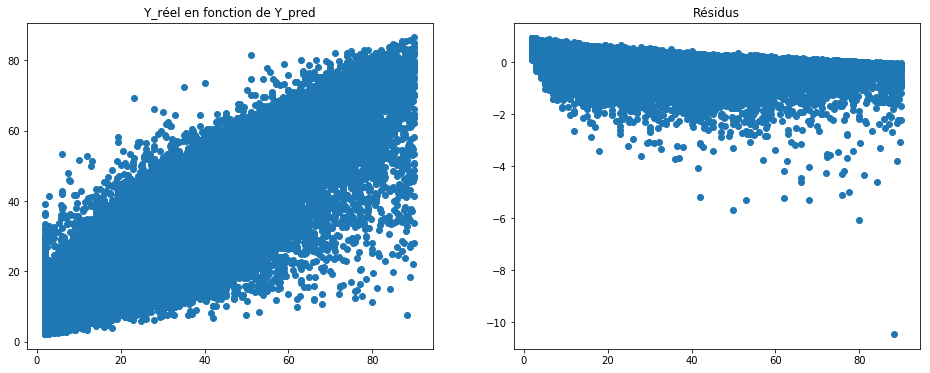

In [30]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Y_réel en fonction de Y_pred')
plt.scatter(y_test,et_predictions)

plt.subplot(1,2,2)
plt.title('Résidus')
plt.scatter(y_test,(et_predictions-y_test)/et_predictions)

In [77]:
evaluate(et_defaut, X_test, y_test)

Model Performance
Average Error: 3.8379 degrees.
Accuracy = 76.56%.


76.56108015823796

# <span style="color:black">ACCURACY Function</span>

In [25]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

# <span style="color:orange">RANDOM FOREST Hyperparameters</span>

In [22]:
# Random forest hyperparameters grid
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 600, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 100, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 16]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [23]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [300, 333, 366, 400, 433, 466, 500, 533, 566, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 28, 37, 46, 55, 64, 73, 82, 91, 100, None], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 8, 16], 'bootstrap': [True, False]}


In [24]:
# Use the random grid to search for best hyperparameters

rf_h = RandomForestRegressor()

# Random search of parameters, using 2 fold cross validation, 
# search across 10 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf_h, param_distributions = random_grid, n_iter = 2, cv = 2, verbose=2, random_state=101, n_jobs = -1)

In [25]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 21.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 21.9min finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=2, n_jobs=-1,
          param_distributions={'n_estimators': [300, 333, 366, 400, 433, 466, 500, 533, 566, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 28, 37, 46, 55, 64, 73, 82, 91, 100, None], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 8, 16], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=101, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [26]:
rf_random.best_params_

{'n_estimators': 533,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 46,
 'bootstrap': True}

In [28]:
evaluate(rf, X_test, y_test)

Model Performance
Average Error: 3.2875 degrees.
Accuracy = 79.53%.


79.528749040709

In [29]:
rf.get_params()

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': 46,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 16,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 410,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# <span style="color:purple">PREDICTIONS TEST et EXPORT</span>

In [39]:
sc = StandardScaler()
X = sc.fit_transform(X)
Xtest = sc.transform(Xtest)

In [35]:
%%time
# Mise à l'épreuve du meilleur algo (Random Forest) sur le data set de test X

Xtest = df_test_X[['station_id','hdres_100','hdres_500','ldres_100','ldres_500','industry_100','industry_500','urbgreen_100','urbgreen_500','roads_length_25','roads_length_100','roads_length_500','major_roads_length_25','major_roads_length_100','major_roads_length_500','distance_0','distance_1','distance_2','distance_3','distance_4','distance_5','distance_6','distance_7','distance_8','distance_9','value_0','value_1','value_2','value_3','value_4','value_5','value_6','value_7','value_8','value_9','y_benchmark']]

rf = RandomForestRegressor(n_estimators=410,max_features='sqrt',max_depth=46,min_samples_split=2,min_samples_leaf=16,bootstrap=False)
rf.fit(X, y)
Yresult = rf.predict(Xtest)

Wall time: 14min 34s


In [41]:
Ypred = pd.DataFrame({'Pred': list(Yresult)})
Ypred.head()

,Pred
0,44.701422
1,45.248803
2,53.339608
3,58.739583
4,67.379494


D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


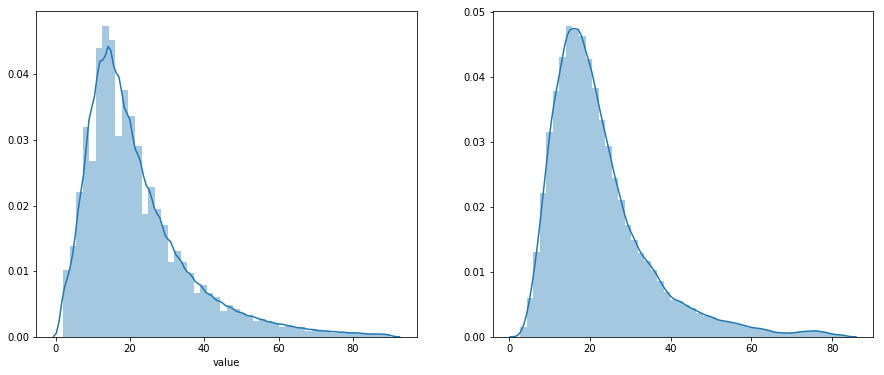

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df_train['value'])
plt.subplot(1,2,2)
sns.distplot(Yresult)

In [43]:
Ypred['Pred'].nunique()

245234

In [44]:
len(Ypred['Pred'])

247473

In [45]:
pd.DataFrame.to_csv(Ypred, 'Submission8.csv', sep=',', index=True)

# <span style="color:green">TREE Visualisation</span>

In [15]:
from graphviz import Digraph
from sklearn.tree import export_graphviz

In [16]:
# extract a tree
estimator =rf.estimators_[5]

In [17]:
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features_name,
                class_names = target_name,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable

# <span style="color:black">------- SAMPLE CSV INPUT Features</span>

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [59]:
df_train_sample = pd.read_csv('df_train_sample.csv')
df_test_X_sample = pd.read_csv('df_test_X_sample.csv')
df_train_sample.head()

,station_id,hdres_100,hdres_500,ldres_100,ldres_500,industry_100,industry_500,urbgreen_100,urbgreen_500,roads_length_25,...,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value,y_benchmark
0,67,1.000,0.938,0.000,0.000,0.000,0.000,0.0,0.003,0.000,...,28.0,27.0,31.0,32.000,46.0,21.0,26.0,23.0,26.0,26
1,71,0.000,0.000,1.000,0.994,0.000,0.000,0.0,0.006,2.201,...,42.2,21.9,21.3,31.400,19.9,18.7,22.7,21.6,22.3,22
2,30,0.776,0.317,0.224,0.650,0.000,0.007,0.0,0.026,0.130,...,44.0,31.0,39.0,57.855,39.0,34.0,40.0,40.0,36.0,40
3,25,0.998,0.506,0.000,0.017,0.002,0.468,0.0,0.008,0.773,...,29.3,18.2,19.5,42.900,19.2,27.1,14.2,16.7,29.3,21
4,30,0.776,0.317,0.224,0.650,0.000,0.007,0.0,0.026,0.130,...,23.9,20.4,15.7,29.700,15.3,21.2,33.3,28.9,11.4,21


In [105]:
# areas benchmarks

df_train_sample['residential_benchmark']=df_train_sample['hdres_100']+df_train_sample['hdres_500']+df_train_sample['ldres_100']+df_train_sample['ldres_500']
df_train_sample['industry_benchmark']=df_train_sample['industry_100']+df_train_sample['industry_500']
df_train_sample['urbgreen_benchmark']=df_train_sample['urbgreen_100']+df_train_sample['urbgreen_500']
df_train_sample['roads_benchmark']=df_train_sample['roads_length_25']+df_train_sample['roads_length_100']+df_train_sample['roads_length_500']+df_train_sample['major_roads_length_25']+df_train_sample['major_roads_length_100']+df_train_sample['major_roads_length_500']

In [110]:
# sur data test

df_test_X_sample['residential_benchmark']=df_test_X_sample['hdres_100']+df_test_X_sample['hdres_500']+df_test_X_sample['ldres_100']+df_test_X_sample['ldres_500']
df_test_X_sample['industry_benchmark']=df_test_X_sample['industry_100']+df_test_X_sample['industry_500']
df_test_X_sample['urbgreen_benchmark']=df_test_X_sample['urbgreen_100']+df_test_X_sample['urbgreen_500']
df_test_X_sample['roads_benchmark']=df_test_X_sample['roads_length_25']+df_test_X_sample['roads_length_100']+df_test_X_sample['roads_length_500']+df_test_X_sample['major_roads_length_25']+df_test_X_sample['major_roads_length_100']+df_test_X_sample['major_roads_length_500']

In [116]:
X=df_train_sample[['station_id','residential_benchmark','industry_benchmark','urbgreen_benchmark','roads_benchmark','y_benchmark']]
y=df_train_sample['value']
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X, y, test_size=0.25, random_state=60)

In [117]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sample = sc.fit_transform(X_train_sample)
X_test_sample = sc.transform(X_test_sample)

#  <span style="color:red">LINEAR REGRESSION</span>

In [118]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_sample, y_train_sample)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
# print the intercept
print(lm.intercept_)

22.017211508414803


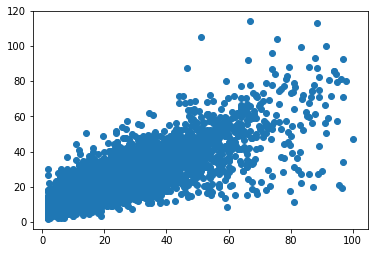

In [120]:
lm_predictions = lm.predict(X_test_sample)
plt.scatter(y_test_sample,lm_predictions)

In [121]:
print('MAE:', mean_absolute_error(y_test_sample, lm_predictions))
print('MSE:', mean_squared_error(y_test_sample, lm_predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test_sample, lm_predictions)))

MAE: 5.775624429363001
MSE: 75.64404305158087
RMSE: 8.697358395028967


# <span style="color:red">GRADIENT BOOSTING REGRESSOR</span>

In [140]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
gradient_boost_model = ensemble.GradientBoostingRegressor(**params)

In [141]:
gradient_boost_model.fit(X_train_sample, y_train_sample)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=50,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [142]:
gb_predictions = gradient_boost_model.predict(X_test_sample)

In [143]:
mse = mean_squared_error(y_test_sample, gb_predictions)
print("MSE: %.4f" % mse)

mse_log = mean_squared_log_error(y_test_sample, gb_predictions)
print("MSE_log: %.4f" % mse_log)

MSE: 72.1924
MSE_log: 0.1253


In [144]:
evaluate(gradient_boost_model, X_test_sample, y_test_sample)

Model Performance
Average Error: 5.4396 degrees.
Accuracy = 67.69%.


67.69277161591538

# <span style="color:red">DECISION TREE REGRESSOR</span>

In [132]:
from sklearn.tree import DecisionTreeRegressor
dt_R = DecisionTreeRegressor()
dt_R.fit(X_train_sample, y_train_sample)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [133]:
dt_predictions = dt_R.predict(X_test_sample)

In [134]:
mse = mean_squared_error(y_test_sample, dt_predictions)
print("MSE: %.4f" % mse)

mse_log = mean_squared_log_error(y_test_sample, dt_predictions)
print("MSE_log: %.4f" % mse_log)

MSE: 75.7177
MSE_log: 0.1263


In [135]:
evaluate(dt_R, X_test_sample, y_test_sample)

Model Performance
Average Error: 5.5155 degrees.
Accuracy = 67.71%.


67.71006412564189

# <span style="color:red">RANDOM FOREST</span>

In [136]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=250,max_features='sqrt',max_depth=70,min_samples_split=5,min_samples_leaf=2,bootstrap=False)
rf.fit(X_train_sample, y_train_sample)
rf_predictions = rf.predict(X_test_sample)

In [137]:
mse = mean_squared_error(y_test_sample, rf_predictions)
print("MSE: %.4f" % mse)

mse_log = mean_squared_log_error(y_test_sample, rf_predictions)
print("MSE_log: %.4f" % mse_log)

MSE: 64.9869
MSE_log: 0.1198


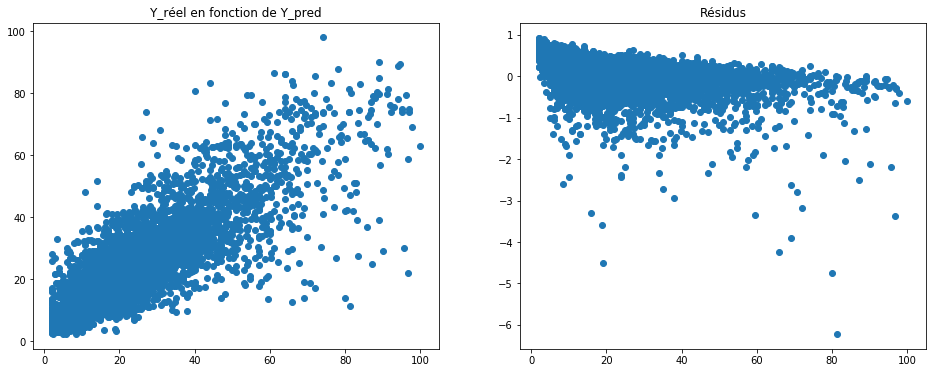

In [138]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Y_réel en fonction de Y_pred')
plt.scatter(y_test_sample,rf_predictions)

plt.subplot(1,2,2)
plt.title('Résidus')
plt.scatter(y_test_sample,(rf_predictions-y_test_sample)/rf_predictions)

In [139]:
evaluate(rf, X_test_sample, y_test_sample)

Model Performance
Average Error: 5.2623 degrees.
Accuracy = 68.36%.


68.36102480932698

# <span style="color:orange">RANDOM FOREST Hyperparameters on the sample</span>

In [38]:
# Random forest hyperparameters grid
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 300, num = 15)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 15]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [39]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10, 20, 30], 'min_samples_leaf': [1, 2, 4, 8, 15], 'bootstrap': [True, False]}


In [40]:
# Use the random grid to search for best hyperparameters

rf_h = RandomForestRegressor()

# Random search of parameters, using 2 fold cross validation, 
# search across 10 different combinations, and use all available cores

rf_random_onsample = RandomizedSearchCV(estimator = rf_h, param_distributions = random_grid, n_iter = 15, cv = 3, verbose=2, random_state=60, n_jobs = -1)

In [42]:
# Fit the random search model
rf_random_onsample.fit(X_train_sample, y_train_sample)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10, 20, 30], 'min_samples_leaf': [1, 2, 4, 8, 15], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=60, refit=True,
          return_train_score='warn', scoring=None, ve

In [43]:
rf_random_onsample.best_params_

{'n_estimators': 260,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [45]:
evaluate(rf_random_onsample, X_test_sample, y_test_sample)

Model Performance
Average Error: 4.4099 degrees.
Accuracy = 73.01%.


73.01287724844344